<a href="https://colab.research.google.com/github/iamrayyaann/ml-archive/blob/main/HydrationModel_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data

In [30]:
df = pd.read_csv('hydration_data.csv')
df

,temperature_celsius,humidity_percent,water_intake_liters
0,15,20,2.44
1,15,25,2.73
2,15,30,2.62
3,15,35,2.55
4,15,40,2.33
...,...,...,...
385,40,70,4.72
386,40,75,4.33
387,40,80,4.30
388,40,85,4.91


# Clean Data

In [31]:
# df = df.drop(['Age', 'Gender', 'Weight_kg', 'Height_cm', 'Activity_Level', 'Exercise_Duration_min', 'Health_Condition'], axis=1)
# df

# Graphs

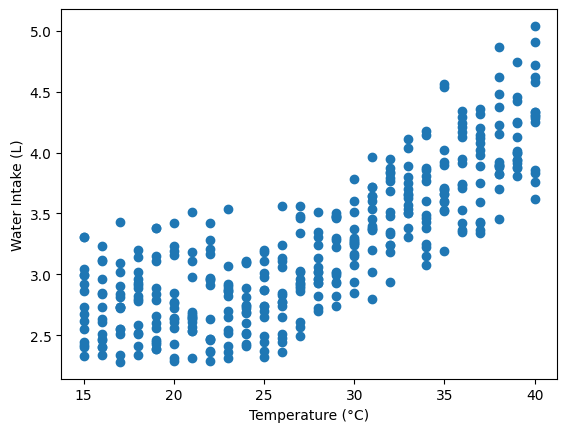

In [32]:
plt.scatter(df['temperature_celsius'], df['water_intake_liters'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Water Intake (L)')
plt.show()

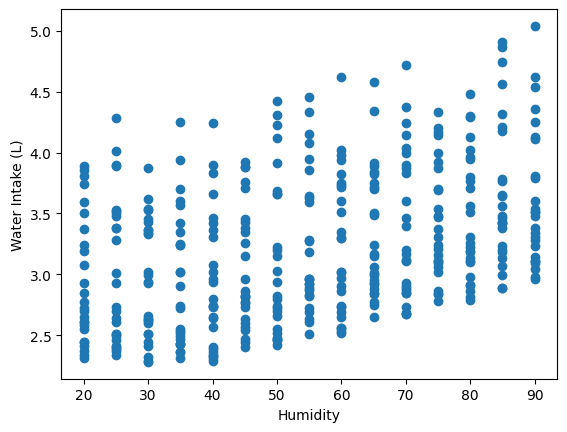

In [33]:
plt.scatter(df['humidity_percent'], df['water_intake_liters'])
plt.xlabel('Humidity')
plt.ylabel('Water Intake (L)')
plt.show()

Text(0.5, 0, 'Water Intake (L)')

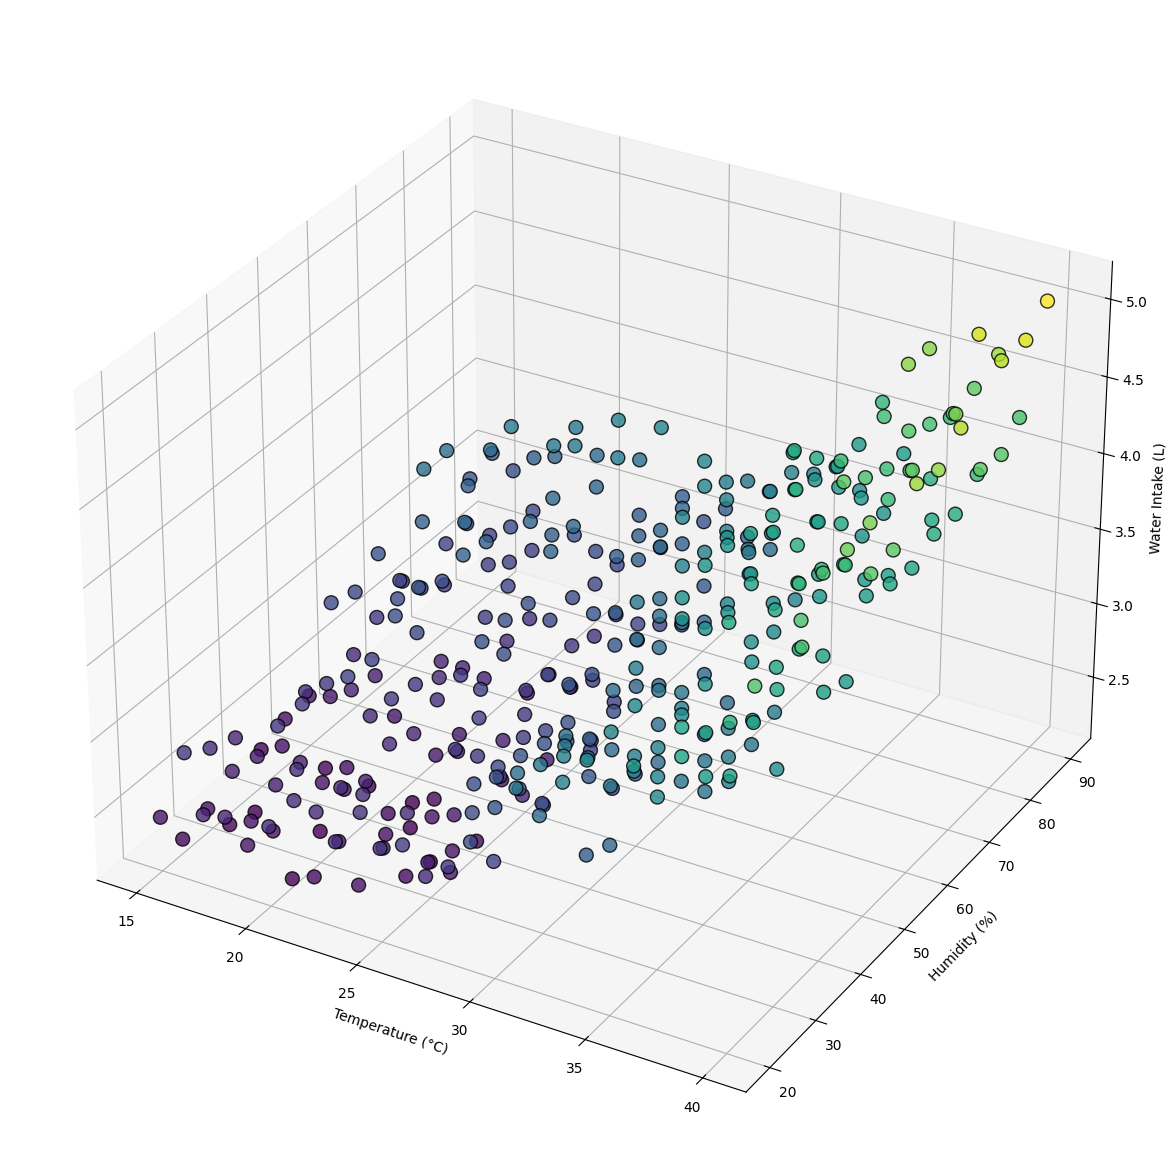

In [34]:
temperature = df['temperature_celsius']
humidity = df['humidity_percent']
water_intake = df['water_intake_liters']

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(temperature, humidity, water_intake,
                     c=water_intake, cmap='viridis',
                     s=100, alpha=0.8, edgecolors='black')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Water Intake (L)')

# Split Data

In [35]:
X = df.drop('water_intake_liters', axis=1)
X

,temperature_celsius,humidity_percent
0,15,20
1,15,25
2,15,30
3,15,35
4,15,40
...,...,...
385,40,70
386,40,75
387,40,80
388,40,85


In [36]:
y = df['water_intake_liters']
y

,water_intake_liters
0,2.44
1,2.73
2,2.62
3,2.55
4,2.33
...,...
385,4.72
386,4.33
387,4.30
388,4.91


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Data

In [38]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# Test Data

In [39]:
y_pred = lr.predict(X_test)

# Evaluate

## General Score

In [40]:
general = lr.score(X_test, y_test)

## MAE

In [41]:
mae = mean_absolute_error(y_test, y_pred)

## MSE

In [42]:
mse = mean_squared_error(y_test, y_pred)

## RMSE

In [43]:
rmse = np.sqrt(mse)

## R^2

In [44]:
r2 = r2_score(y_test, y_pred)

# Evaluation Summary

In [45]:
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

MAE:  0.22
MSE:  0.07
RMSE: 0.26
R²:   0.812


# Save Model

In [46]:
import joblib

joblib.dump(model, 'hydration_model.pkl')

model = joblib.load('hydration_model.pkl')